#### Notebook config

In [1]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from arrau import *
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(WARNING) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


Init the project. All the metadata should be read from the runfile(s).

In [5]:
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano'
# syn = ProjSyn('method_s01', path=path_eph, cat=0) # see 0834

# Waveform plots

## Raw data

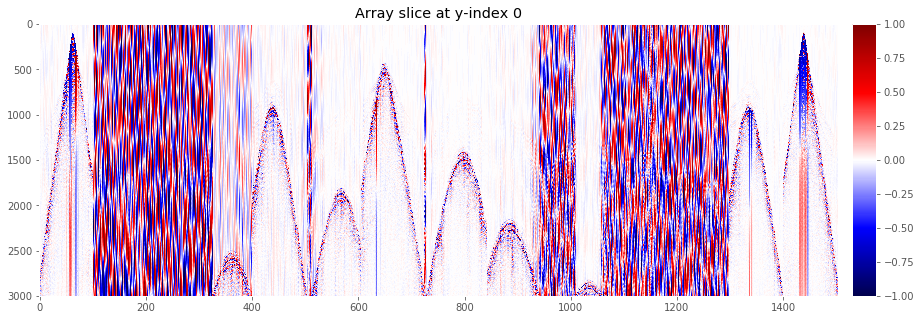

In [6]:
figure(15,5)
syn.i.ose.plot(win=dict(tracf=[4104]), norm='max')

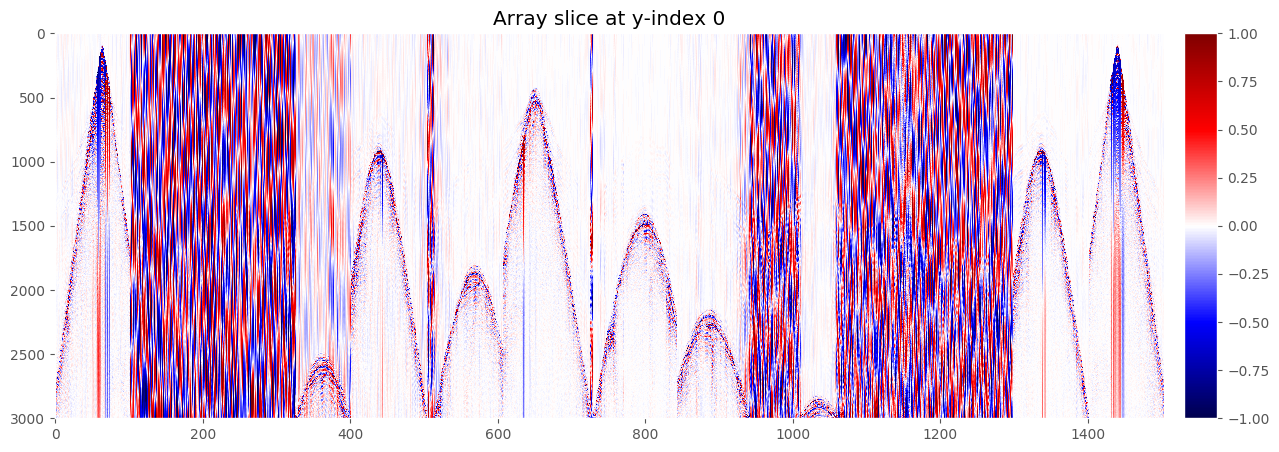

In [21]:
figure(15,5)
syn.i.ose.plot(win=dict(tracf=[4104]), norm='max')

## Filtered data

In [4]:
from fullwavepy.seismic.data import DataFileSgy
name = 'Ose.sgy'
path = './'
fname = path + name
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
# !cp {syn.i.ose.fname} {fname}
f = DataFileSgy(name, path)

In [7]:
%%time 
f.filt(dt=0.0025,  **kw_filt)

CPU times: user 52 ms, sys: 32 ms, total: 84 ms
Wall time: 30.8 s


In [53]:
from fullwavepy.seismic.data import DataGather
kws = dict(win=dict(tracf=[4176], ep=[5]), norm='max')
a1 = DataGather(f.read(**kws)[:,0,:])
a2 = DataGather(syn.o.syn.read(**kws)[:,0,:])

In [54]:
# a1.modify(spect='ampl')
# a2.modify(spect='ampl')
a1.normalise()
a2.normalise()
il = DataGather(a1.interlace(a2.arr))
il.axes[1].extent = [0,7.5]

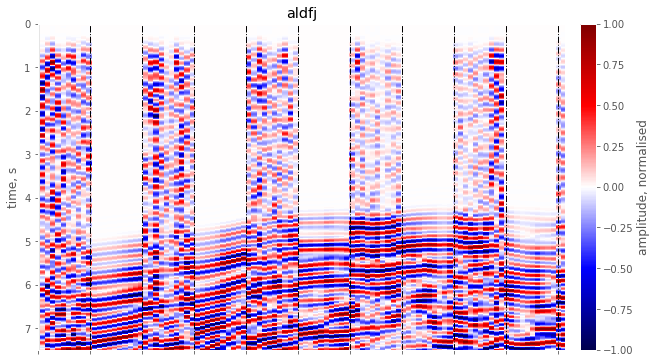

In [55]:
figure(10,6)
il.plot(aspect='auto', label='amplitude, normalised')
plt.gca().invert_yaxis()
chunk_size = 10
ti = np.arange(len(il.arr))[::chunk_size] - .5     
ax = plt.gca()
ax.set_title('aldfj')
ax.set_xticks(ti)
ax.grid(axis='x', c='k', linestyle='-.', linewidth=1)  
empty_string_labels = ['']*len(ti)
ax.set_ylabel('time, s')
_ = ax.set_xticklabels(empty_string_labels)

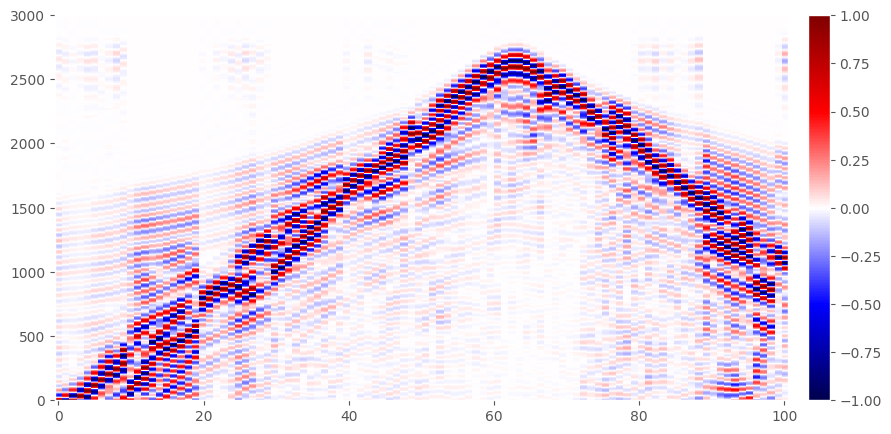

In [53]:
figure(10,5)
f.compare(syn.o.syn, **kws)

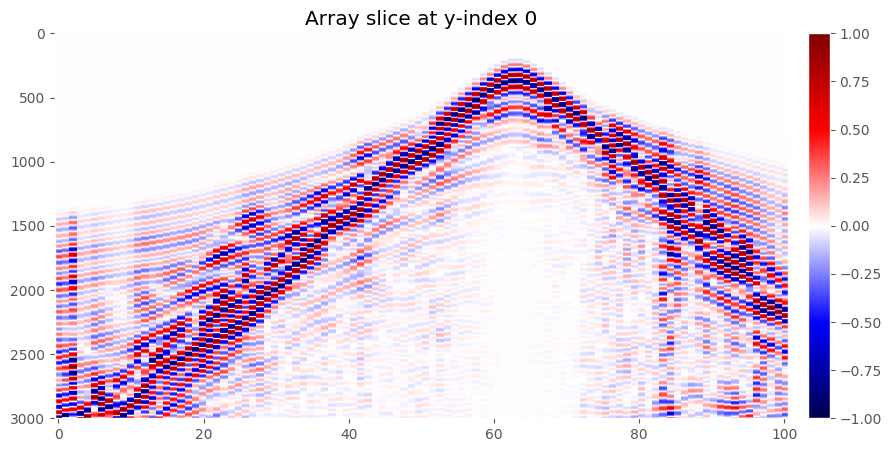

In [38]:
figure(10,5)
syn.o.syn.plot(**kws)

# Phase plots

See `Data_Fit` and `SuppA`.

# ...